In [1]:
!nvcc bt01_p1.cu -o bt01

In [3]:
!./bt01 in.pnm out_pv1.pnm

Image size (width x height): 640 x 434

Processing time (use host): 2.392224 ms

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time (use device): 0.915648 ms

Error between device result and host result: 0.000014


In [4]:
!ls

bt01  bt01_p1.cu  in.pnm  out_pv1_device.pnm  out_pv1_host.pnm	sample_data


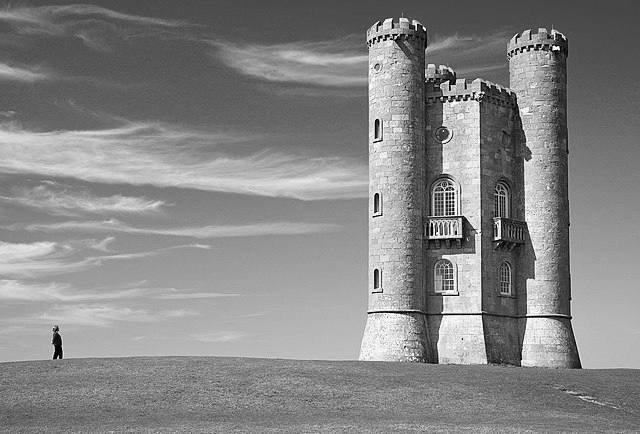

In [5]:
show_pnm("out_pv1_device.pnm")

In [2]:
# Đoạn code Python để hiển thị file ảnh pnm ở notebook
# Ví dụ để hiển thị file "img.pnm", ở dòng cuối của code cell
# bạn gõ (không cần dấu ! đằng trước): show_pnm('img.pnm')
# LƯU Ý: bạn phải chạy cell này một lần thì mới gọi được hàm show_pnm
from PIL import Image
import numpy as np
def show_pnm(file_name):
  with open(file_name, 'r') as f:
    vals = f.read().split()
  w = int(vals[1])
  h = int(vals[2])
  if vals[0] == 'P2': # Grayscale
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w))
  elif vals[0] == 'P3': # RGB
    pixels = np.array(vals[4:], dtype=np.uint8).reshape((h, w, 3))
  else:
    return None
  
  return Image.fromarray(pixels)

# Đoạn code Python để hiển thị file chứa ma trận ở notebook
# (một dòng của ma trận ứng với một dòng trong file, 
# các phần tử trên mỗi dòng được cách nhau bởi khoảng trắng) 
# Ví dụ để hiển thị file "pixel_importance.txt", ở dòng cuối của code cell
# bạn gõ: show_matrix('pixel_important.txt')
def show_matrix(matrix_file):
  m = np.loadtxt(matrix_file)
  m = m + m.min()
  m = m / m.max()
  m = m * 255
  m = m.astype(np.uint8)
  return Image.fromarray(m)

In [6]:
!nvcc sc_parallel_v1.cu -o sc_pv1

In [13]:
!./sc_pv1 in.pnm out_pv1.pnm edge_pv1.txt gray_ok_pv1.txt p3_ok_pv1.pnm 430

0: ./sc_pv1
 1: in.pnm
 2: out_pv1.pnm
 3: edge_pv1.txt
 4: gray_ok_pv1.txt
 5: p3_ok_pv1.pnm
 6: 430
 Image size (width x height): 640 x 434

GPU name: Tesla T4
GPU compute capability: 7.5
Processing time (use device): 0.901888 ms

Image size after Seam Carving (width x height): 430 x 434



In [14]:
!ls

bt01	      gray_ok_pv1.txt	  out_pv1_host.pnm  sample_data
bt01_p1.cu    in.pnm		  out_pv1.pnm	    sc_parallel_v1.cu
edge_pv1.txt  out_pv1_device.pnm  p3_ok_pv1.pnm     sc_pv1


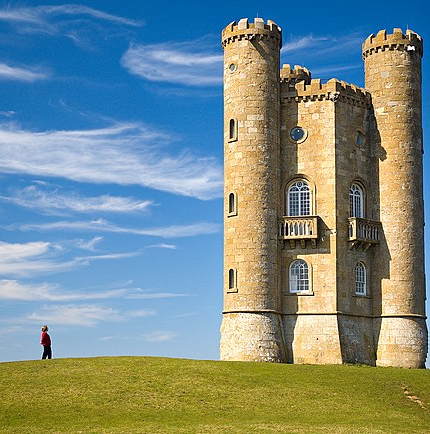

In [15]:
show_pnm("p3_ok_pv1.pnm")

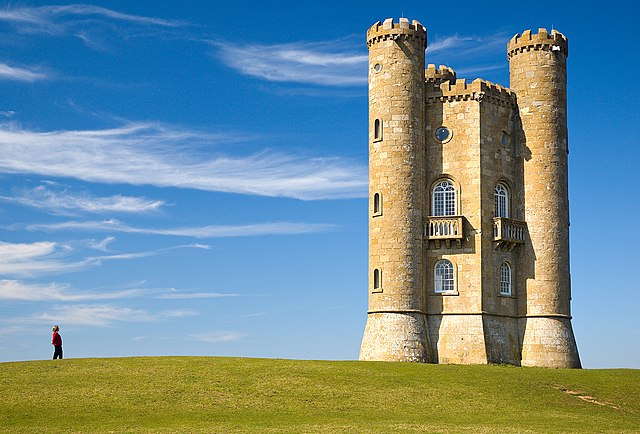

In [16]:
show_pnm("in.pnm")